

## **Inteligencia Artificial 2025 Lab 2**
**Parte 5**






In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Cargar los datos

In [4]:
df = pd.read_csv("weather.csv")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,station
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5,St. John’s
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9,Charlottetown
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9,Halifax
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8,Sydney
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3,Yarmouth


Extraer los datos numéricos (las temperaturas de cada mes)

In [6]:
X = df.iloc[:, :-1].values
stations = df["station"].values

 Normalizar los datos (centrado y escalado)

In [7]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

Aplicar PCA con 2 componentes principales

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

Se obtienen los primeros dos componentes principales

In [9]:
p1 = pca.components_[0]
p2 = pca.components_[1]

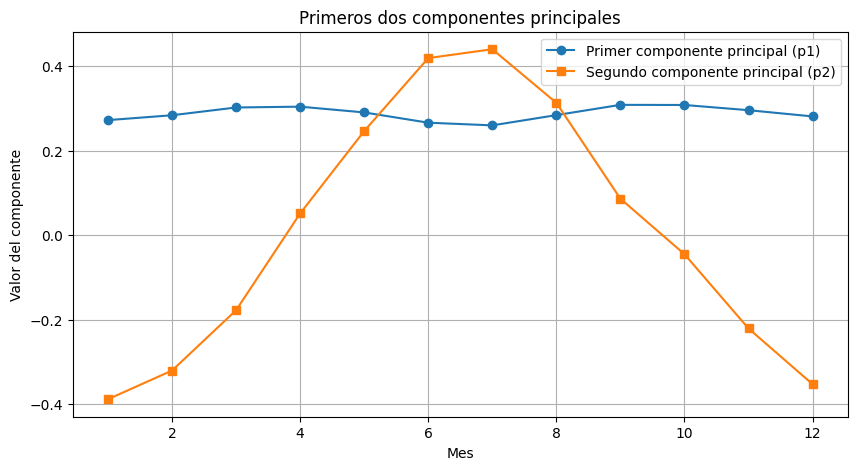

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), p1, marker='o', label="Primer componente principal (p1)")
plt.plot(range(1, 13), p2, marker='s', label="Segundo componente principal (p2)")
plt.xlabel("Mes")
plt.ylabel("Valor del componente")
plt.title("Primeros dos componentes principales")
plt.legend()
plt.grid(True)
plt.show()

**Como vemos el primer componente representa una tendencia global en los datos climaticos, tipo el promedio de cada estacion y las compara y por eso no hay tanta variacion.**

Pero si vemos el segundo componente vemos un comportamiento mas raro, que en los meses de en medio es mas alta la temperatura entonces este solo esta analizando eso en todas las temporadas.


#Crear un biplot de las estaciones en el espacio PCA

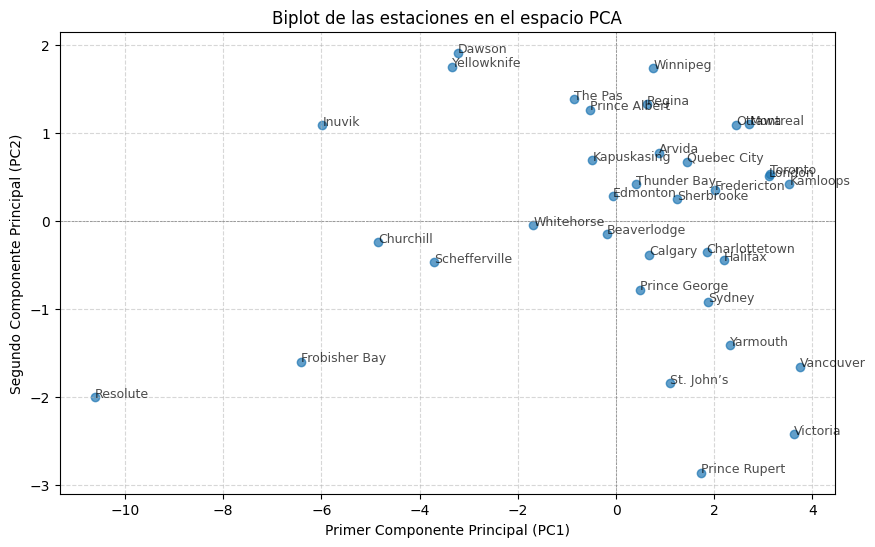

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for i, station in enumerate(stations):
    plt.text(X_pca[i, 0], X_pca[i, 1], station, fontsize=9, alpha=0.7) #Anade las etiquetas
plt.xlabel("Primer Componente Principal (PC1)")
plt.ylabel("Segundo Componente Principal (PC2)")
plt.title("Biplot de las estaciones en el espacio PCA")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [21]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.84836609 0.1243107 ]


## Parte 6

In [36]:
from skimage import color, io
from skimage.util import view_as_blocks

Cargar la imagen en escala de grises

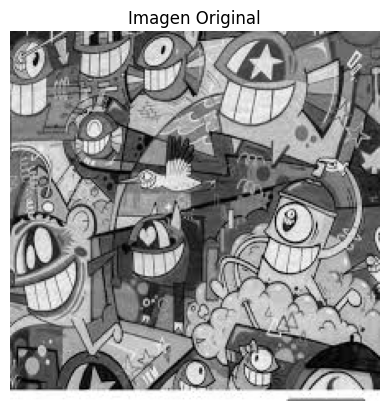

In [54]:
image = io.imread("imagen.jpg", as_gray=True)
if image.max() > 1:
    image = image / 255.0
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')
plt.show()

Definir tamaño de bloque

In [55]:
block_size = 8  # Se puede ajustar

Dividir la imagen en bloques de tamaño block_size x block_size

In [56]:
h, w = image.shape
h_crop, w_crop = (h // block_size) * block_size, (w // block_size) * block_size
image = image[:h_crop, :w_crop]

aplicar view_as_blocks()

In [57]:
blocks = view_as_blocks(image, block_shape=(block_size, block_size))
num_blocks_h, num_blocks_w = blocks.shape[:2]
blocks = blocks.reshape(-1, block_size * block_size)  # Vectorizar cada bloque

Aplicar PCA y reconstruir la imagen con diferentes valores de k

In [58]:
k_values = [5, 10, 20]  # Valores de componentes principales a mantener

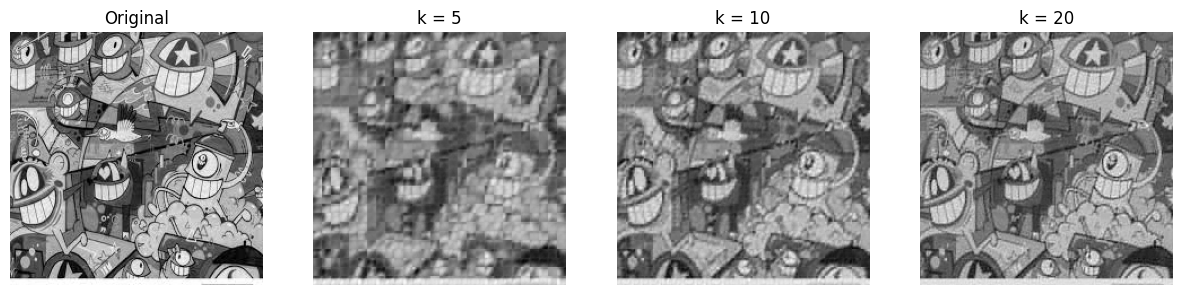

In [61]:
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')
for i, k in enumerate(k_values):
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(blocks)
    reconstructed = pca.inverse_transform(transformed)

    # Volver a formar la imagen desde los bloques reconstruidos
    reconstructed_image = reconstructed.reshape(num_blocks_h, num_blocks_w, block_size, block_size)
    reconstructed_image = np.block([[reconstructed_image[i, j] for j in range(num_blocks_w)]
                                     for i in range(num_blocks_h)])

    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f"k = {k}")
    axes[i + 1].axis('off')

plt.show()